In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# **Decision Tree Classifier**

In [ ]:
data=pd.DataFrame({
    'Weather':['sunny','sunny','cloudy','rain','rain','rain','cloudy','sunny','sunny','rain','sunny','cloudy','cloudy','rain'],
    'Temperature':['hot','hot','hot','mild','cool','cool','cool','mild','cool','mild','mild','mild','hot','mild'],
    'Humidity':['high','high','high','high','normal','normal','normal','high','normal','normal','normal','high','normal','high'],
    'Wind':['weak','strong','weak','weak','weak','strong','strong','weak','weak','weak','strong','strong','weak','strong'],
    'Play':['no','no','yes','yes','yes','no','yes','no','yes','yes','yes','yes','yes','no']
})
data
df= sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df.isna().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [ ]:
# drop deck column
df.drop('deck', axis=1, inplace=True)
# imputer age and fare using median
df['age'].fillna(df['age'].median(), inplace=True)
df['fare'].fillna(df['fare'].median(), inplace=True)
# impute missing value of embarked with mode
imputer=SimpleImputer(strategy='most_frequent')
df[['embarked','embark_town']]=imputer.fit_transform(df[['embarked','embark_town']])

<ipython-input-28-9e02465b3430>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
<ipython-input-28-9e02465b3430>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [ ]:
df.isna().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  891 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB


In [ ]:
# Encode the categorical and object variable using for loop and labelencoder
le=LabelEncoder()
for col in df.select_dtypes(include=['object','category']):
    df[col]=le.fit_transform(df[col])

In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,True,2,0,False
1,1,1,0,38.0,1,0,71.2833,0,0,2,False,0,1,False
2,1,3,0,26.0,0,0,7.9250,2,2,2,False,2,1,True
3,1,1,0,35.0,1,0,53.1000,2,0,2,False,2,1,False
4,0,3,1,35.0,0,0,8.0500,2,2,1,True,2,0,True


In [ ]:
# split the data
X=df.drop(['survived','alive'], axis=1)
y=df['survived']

In [ ]:
# split train test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# model=DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=42)
model=DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# predict model
y_pred=model.predict(X_test)

In [ ]:
# evaluate  model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.75      0.78       105
           1       0.68      0.76      0.72        74

    accuracy                           0.75       179
   macro avg       0.75      0.75      0.75       179
weighted avg       0.76      0.75      0.76       179

[[79 26]
 [18 56]]


<Axes: >

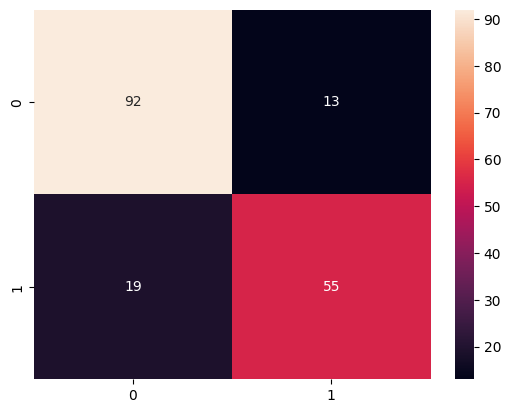

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [ ]:
# save the decesion tree
from sklearn.tree import export_graphviz
export_graphviz(model, out_file='DecisionTree.dot', feature_names=X.columns, class_names=['0','1'], filled=True,rounded=True)
# website to view decesion tree "Graphviz Online"

# **Decision Tree Regressor**

In [ ]:
df= sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
df.isna().sum()

,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


In [ ]:
# Encode the categorical and object variable using for loop and labelencoder
le=LabelEncoder()
for col in df.select_dtypes(include=['object','category']):
    df[col]=le.fit_transform(df[col])
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4


In [ ]:
# split the data
X=df.drop('tip', axis=1)
y=df['tip']

In [ ]:
# split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model=DecisionTreeRegressor(criterion='absolute_error')
# model=DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='absolute_error')

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
# evaluate the model
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R2: {r2_score(y_test, y_pred)}")

MSE: 1.2470408163265307
R2: 0.0023444769012946898


In [ ]:
# save the decesion tree
from sklearn.tree import export_graphviz
export_graphviz(model, out_file='DecisionTreeRegressor.dot', feature_names=X.columns, class_names=['0','1'], filled=True,rounded=True)
# website to view decesion tree "Graphviz Online"